In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
df.shape

(5110, 12)

# According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
# This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.



# Attribute Information
# 1) id: unique identifier
# 2) gender: "Male", "Female" or "Other"
# 3) age: age of the patient
# 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
# 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
# 6) ever_married: "No" or "Yes"
# 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
# 8) Residence_type: "Rural" or "Urban"
# 9) avg_glucose_level: average glucose level in blood
# 10) bmi: body mass index
# 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
# 12) stroke: 1 if the patient had a stroke or 0 if not
# *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [6]:
df.size

61320

In [7]:
df.index

RangeIndex(start=0, stop=5110, step=1)

In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# EDA(Exploring Data and Understanding features doing univariate analysis,Bivariate analysis,Finding Distribution) and Data Cleaning(Finding Types of Features,Duplicate values,Missing Values,Outlier Detection)
# Feature Engineering((Imputting Missing Values,Outlier,handlingImbalanced)) and Feature Selection and Feature Scaling
# Model Selection 
# Model Building 
# Model HyperParameterTuning
# Model Evaluation(Testing)

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df.drop(columns='id',axis='columns',inplace=True)

In [14]:
df.iloc[0]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

In [15]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [16]:
df.duplicated().sum()

0

In [17]:
#there is no duplicated values

In [18]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
df.isnull().sum()*100/len(df)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

<AxesSubplot:>

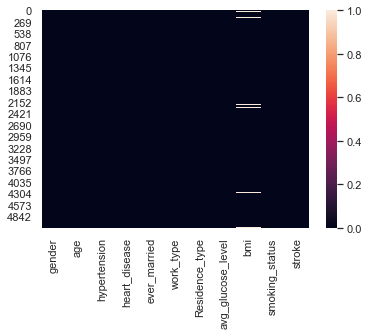

In [20]:
sns.heatmap(df.isnull())

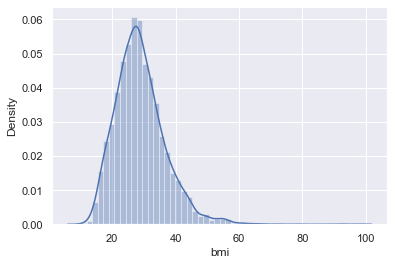

In [21]:
sns.distplot(df['bmi']);

In [22]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

<AxesSubplot:>

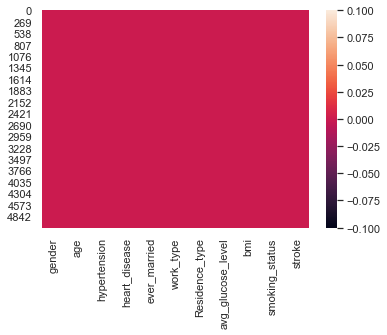

In [23]:
sns.heatmap(df.isnull())

# Univariate Analysis

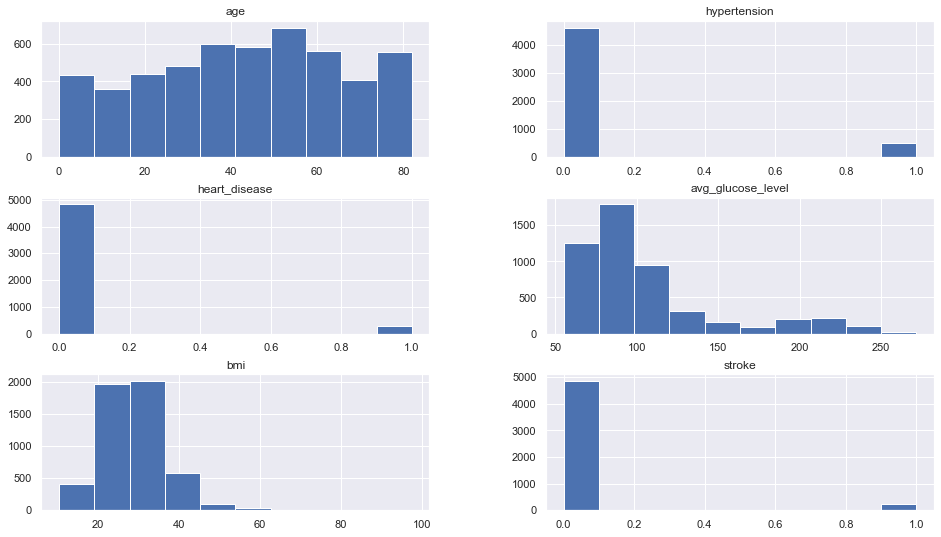

In [24]:
df.hist(figsize=(16,9));

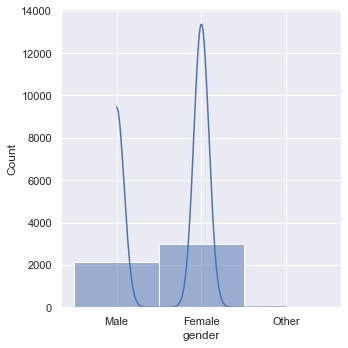

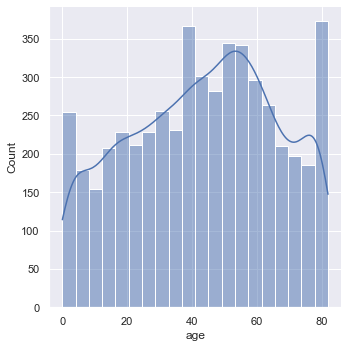

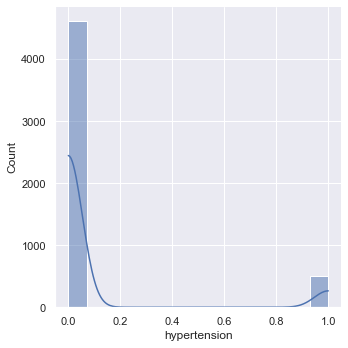

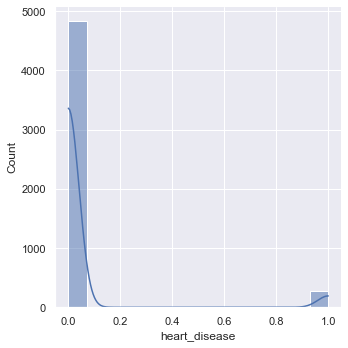

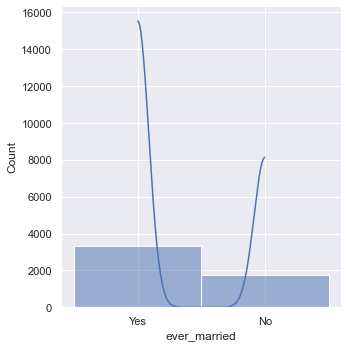

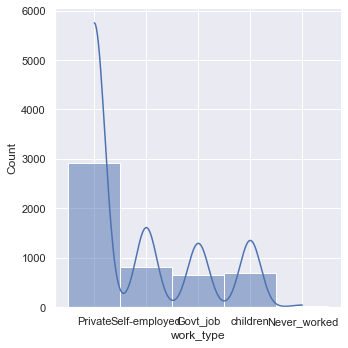

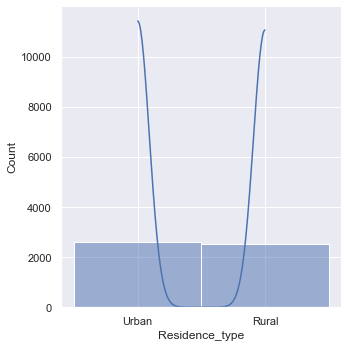

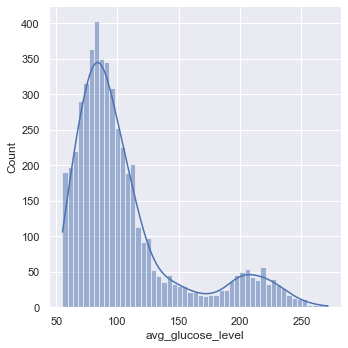

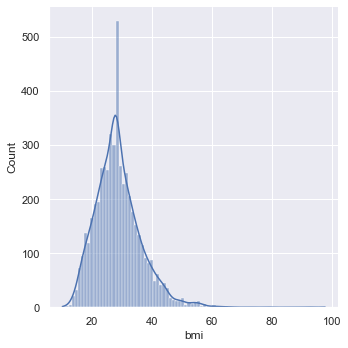

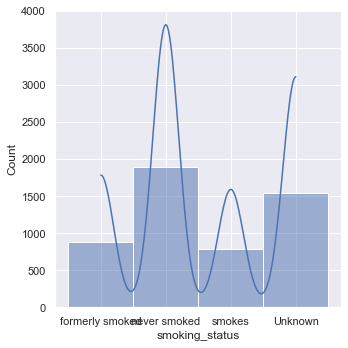

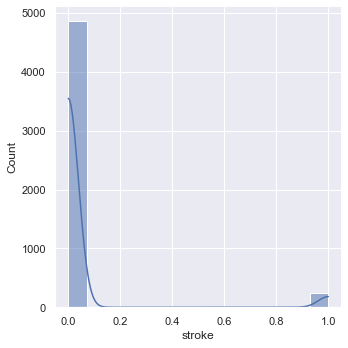

In [25]:
for col in df.columns:
    sns.displot(df[col],kde=True)

In [26]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [27]:
#imbalanced dataset

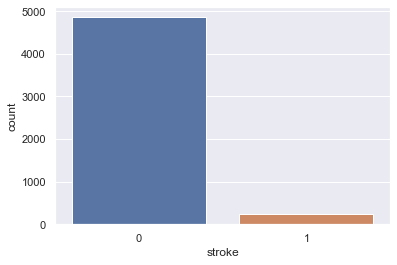

In [28]:
sns.countplot(x='stroke',data=df);

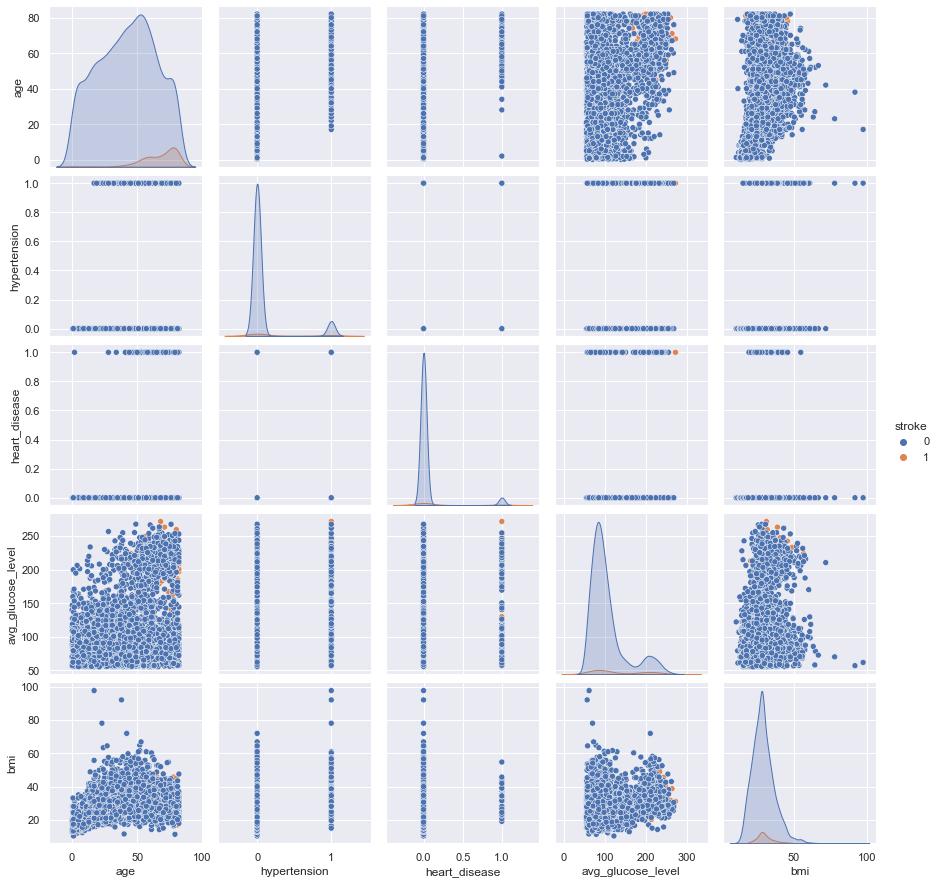

In [29]:
sns.pairplot(hue='stroke',data=df);

# Checking Outliers

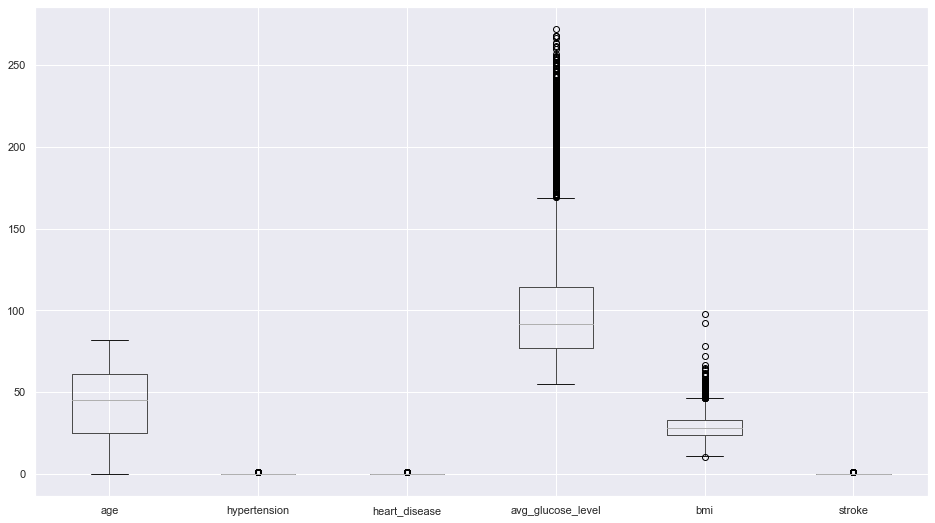

In [30]:
plt.figure(figsize=(16,9))
df.boxplot();

In [31]:
df.iloc[0]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

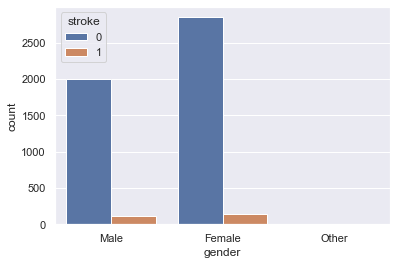

In [32]:
sns.countplot(hue='stroke',x='gender',data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

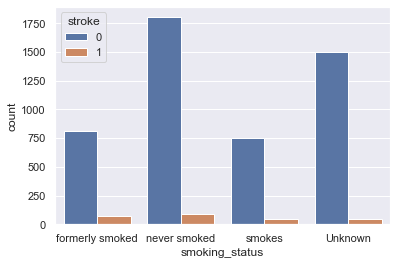

In [33]:
sns.countplot(hue='stroke',x='smoking_status',data=df)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

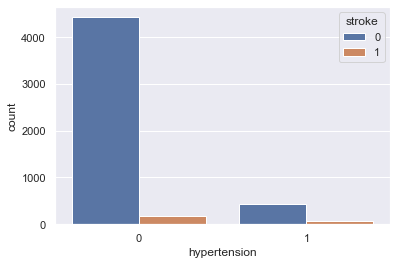

In [34]:
sns.countplot(hue='stroke',x='hypertension',data=df)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

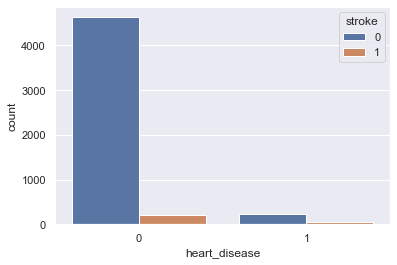

In [35]:
sns.countplot(hue='stroke',x='heart_disease',data=df)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

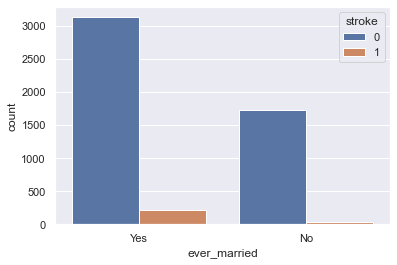

In [36]:
sns.countplot(hue='stroke',x='ever_married',data=df)

<AxesSubplot:xlabel='work_type', ylabel='count'>

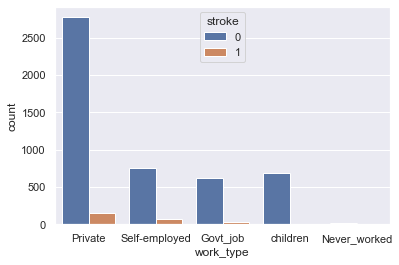

In [37]:
sns.countplot(hue='stroke',x='work_type',data=df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

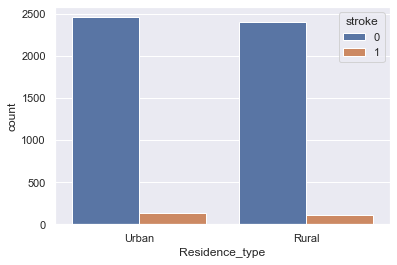

In [38]:
sns.countplot(hue='stroke',x='Residence_type',data=df)

In [39]:
df.iloc[0]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

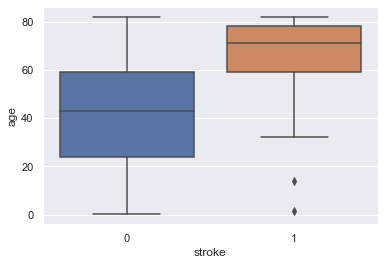

In [40]:
sns.boxplot(x='stroke',y='age',data=df);

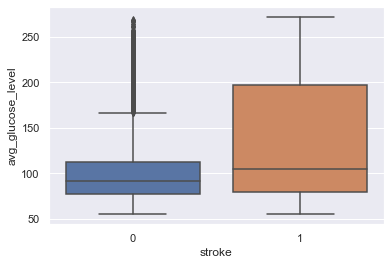

In [41]:
sns.boxplot(x='stroke',y='avg_glucose_level',data=df);

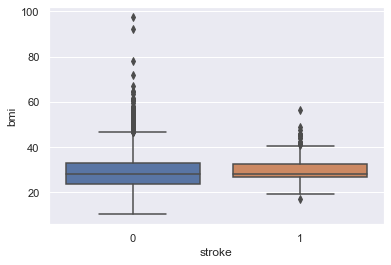

In [42]:
sns.boxplot(x='stroke',y='bmi',data=df);

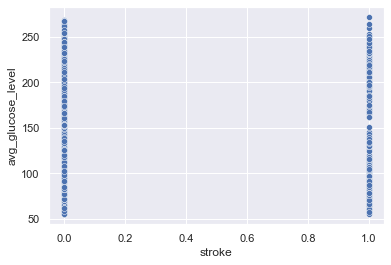

In [43]:
sns.scatterplot(x='stroke',y='avg_glucose_level',data=df);

# if avg_glucose_level is 270 or more than it  then less chances of Stroke

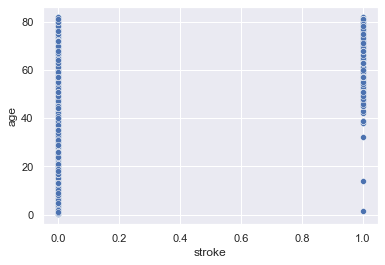

In [44]:
sns.scatterplot(x='stroke',y='age',data=df);

# if age is b/w 0 to 30 then there is less chances of Stroke

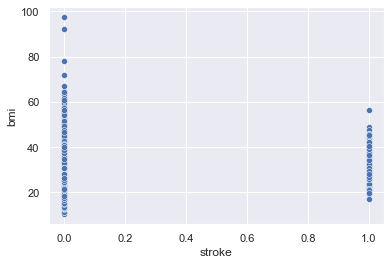

In [45]:
sns.scatterplot(x='stroke',y='bmi',data=df);

# if bmi is b/w 60 to 100 then there is less chances of Stroke

# Feature Selection

In [46]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


In [47]:
df.corr()['stroke']

age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.036110
stroke               1.000000
Name: stroke, dtype: float64

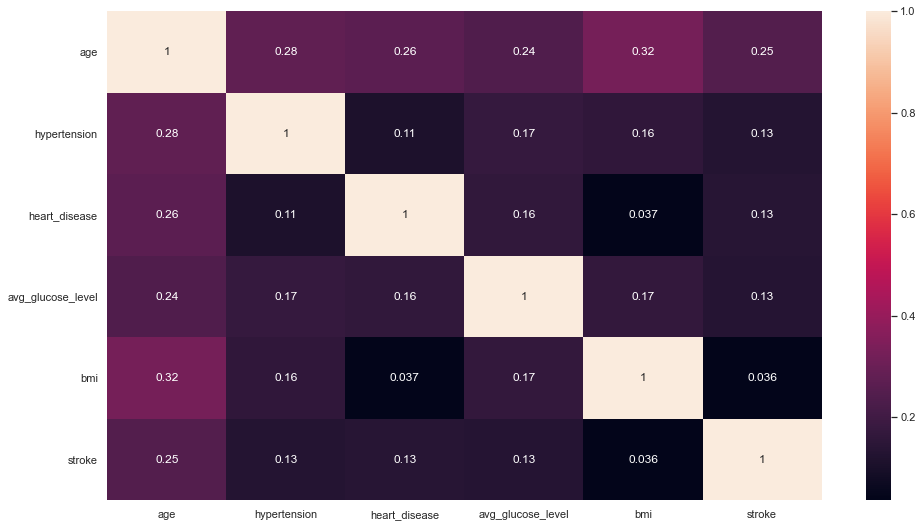

In [48]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True);

In [49]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1


# Encoding Categorical Features

In [50]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [51]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [53]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [54]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [55]:
le=LabelEncoder()

In [56]:
gender=le.fit_transform(df['gender'])

In [57]:
ever_married=le.fit_transform(df['ever_married'])

In [58]:
work_type=le.fit_transform(df['work_type'])

In [59]:
Residence_type=le.fit_transform(df['Residence_type'])

In [60]:
smoking_status=le.fit_transform(df['smoking_status'])

In [61]:
df['gender']=gender

In [62]:
df['ever_married']=ever_married

In [63]:
df['work_type']=work_type

In [64]:
df['Residence_type']=Residence_type

In [65]:
df['smoking_status']=smoking_status

In [66]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [180]:
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [67]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0
5109,0,44.0,0,0,1,0,1,85.28,26.2,0,0


In [68]:
X=df.drop(columns='stroke',axis='columns')

In [69]:
y=df['stroke']

In [70]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [71]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# Model Selection

# Logistic Regression

In [72]:
lr=LogisticRegression()

In [73]:
lrc=cross_val_score(lr,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [74]:
lrc

array([0.95107632, 0.95303327, 0.95107632, 0.95107632, 0.95107632,
       0.95107632, 0.94911937, 0.95107632, 0.95499022, 0.95303327])

In [75]:
lrc.mean()

0.9516634050880626

# SVM

In [76]:
sc=SVC()

In [77]:
scv=cross_val_score(sc,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [78]:
scv

array([0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95107632,
       0.95107632, 0.95107632, 0.95107632, 0.95107632, 0.95303327])

In [79]:
scv.mean()

0.9512720156555773

# KNN

In [80]:
kn=KNeighborsClassifier()

In [81]:
knv=cross_val_score(kn,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [82]:
knv

array([0.94129159, 0.94129159, 0.94911937, 0.94911937, 0.93933464,
       0.94716243, 0.94520548, 0.94324853, 0.94324853, 0.94129159])

In [83]:
knv.mean()

0.9440313111545988

# DecisionTreeClassifier

In [84]:
dt=DecisionTreeClassifier()

In [85]:
dtv=cross_val_score(dt,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [86]:
dtv

array([0.91780822, 0.91585127, 0.90802348, 0.91389432, 0.8962818 ,
       0.90998043, 0.92172211, 0.91780822, 0.91585127, 0.92563601])

In [87]:
dtv.mean()

0.9142857142857144

# RandomForest

In [88]:
rf=RandomForestClassifier()

In [89]:
rfv=cross_val_score(rf,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [90]:
rfv

array([0.94911937, 0.95107632, 0.95303327, 0.94911937, 0.94716243,
       0.95303327, 0.94911937, 0.95107632, 0.94911937, 0.95107632])

In [91]:
rfv.mean()

0.950293542074364

# Adaboost

In [92]:
ad=AdaBoostClassifier()

In [93]:
adv=cross_val_score(ad,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [94]:
adv

array([0.95107632, 0.94911937, 0.95107632, 0.95107632, 0.94911937,
       0.95107632, 0.95303327, 0.95107632, 0.94911937, 0.95107632])

In [95]:
adv.mean()

0.9506849315068493

# GradientBoost

In [96]:
gb=GradientBoostingClassifier()

In [97]:
gbv=cross_val_score(gb,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [98]:
gbv

array([0.95107632, 0.94716243, 0.94716243, 0.95107632, 0.94520548,
       0.94911937, 0.95107632, 0.94911937, 0.94911937, 0.94716243])

In [99]:
gbv.mean()

0.9487279843444225

# XGBoost

In [100]:
xg=XGBClassifier()

In [101]:
xgv=cross_val_score(xg,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [102]:
xgv

array([0.94324853, 0.94324853, 0.94716243, 0.94520548, 0.9295499 ,
       0.93737769, 0.94911937, 0.94324853, 0.94520548, 0.93737769])

In [103]:
xgv.mean()

0.9420743639921723

# ExtraaTreesClassifier

In [104]:
ex=ExtraTreesClassifier()

In [105]:
exv=cross_val_score(ex,X,y,cv=10,scoring='accuracy',n_jobs=-1)

In [106]:
exv

array([0.94716243, 0.93933464, 0.94911937, 0.94129159, 0.94129159,
       0.94716243, 0.95303327, 0.95107632, 0.94324853, 0.94129159])

In [107]:
exv.mean()

0.9454011741682974

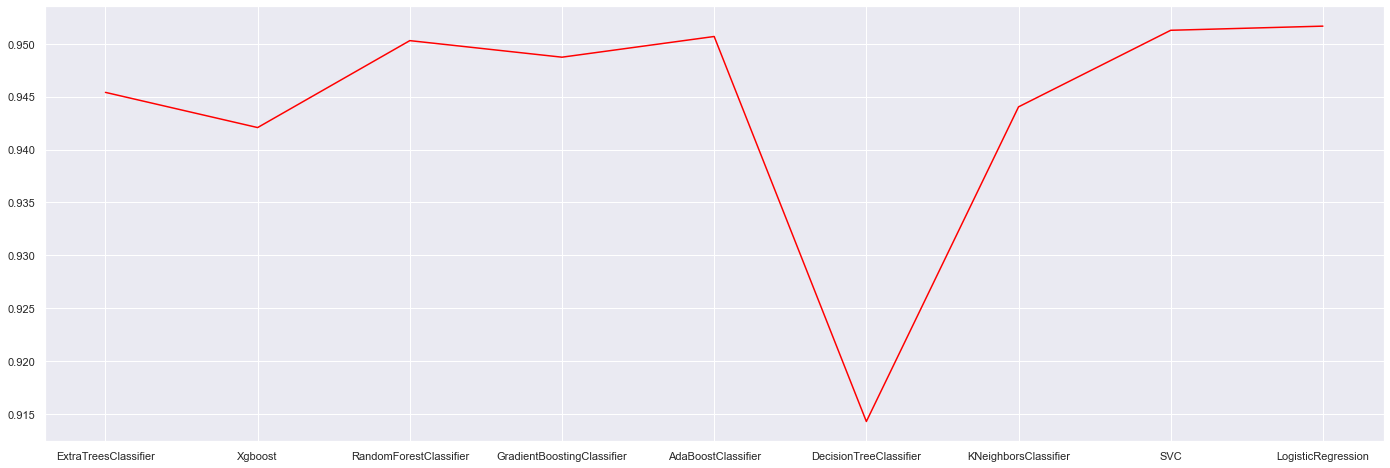

In [108]:
plt.figure(figsize=(24,8))
plt.plot(['ExtraTreesClassifier','Xgboost','RandomForestClassifier','GradientBoostingClassifier',
         'AdaBoostClassifier','DecisionTreeClassifier','KNeighborsClassifier','SVC','LogisticRegression'],
        [exv.mean(),xgv.mean(),rfv.mean(),gbv.mean(),adv.mean(),dtv.mean(),knv.mean(),scv.mean(),lrc.mean()],color='red')

# Will Select Random forest for model building

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [110]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
346,1,68.00,0,0,1,2,0,116.23,26.1,2
4296,0,64.00,0,0,1,2,0,75.13,31.1,1
1614,0,0.08,0,0,0,4,1,139.67,14.1,0
457,0,33.00,1,0,1,2,1,74.44,45.2,3
2801,1,0.80,0,0,0,4,1,75.22,33.1,0
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.6,2
466,0,61.00,1,0,1,2,0,170.05,60.2,3
3092,0,1.16,0,0,0,4,1,97.28,17.8,0
3772,1,80.00,0,0,1,3,0,196.08,31.0,1


In [111]:
X_train.shape

(4599, 10)

In [112]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,0
4478,1,40.0,0,0,1,3,0,65.29,28.3,2
3849,0,8.0,0,0,0,4,1,74.42,22.5,0
4355,0,79.0,1,0,1,3,0,76.64,19.5,2
3826,0,75.0,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
252,0,70.0,0,0,1,2,0,69.04,35.9,1
1833,1,14.0,0,0,0,4,1,92.86,20.7,1
3411,0,26.0,0,0,1,2,0,88.79,24.9,2
350,0,79.0,1,1,1,3,1,200.28,30.0,1


In [113]:
X_test.shape

(511, 10)

In [114]:
y_train

346     0
4296    0
1614    0
457     0
2801    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4599, dtype: int64

In [115]:
y_train.shape

(4599,)

In [116]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
252     0
1833    0
3411    0
350     0
3413    0
Name: stroke, Length: 511, dtype: int64

In [117]:
y_test.shape

(511,)

# handling imbalanced label by oversampling

In [118]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [119]:
os=RandomOverSampler(0.90)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_ns)))

Original dataset shape Counter({0: 4378, 1: 221})
Resampled dataset shape Counter({0: 4378, 1: 3940})


In [120]:
#Validation_Data

In [121]:
X_train_val,X_test_val,y_train_val,y_test_val=train_test_split(X_train_ns,y_train_ns,test_size=0.1,random_state=42)

In [122]:
X_train_val

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4506,1,27.0,0,0,0,0,0,65.12,41.1,3
1313,1,59.0,0,0,1,0,1,101.24,26.5,2
2884,1,44.0,0,0,1,2,1,99.34,33.1,2
3614,1,8.0,0,0,0,4,0,78.05,25.7,0
5314,0,54.0,1,0,1,0,1,180.93,27.7,2
...,...,...,...,...,...,...,...,...,...,...
5734,0,80.0,0,0,1,2,1,73.54,24.0,0
5191,1,57.0,0,0,1,2,0,84.96,36.7,0
5390,0,82.0,0,0,1,2,0,59.32,33.2,2
860,1,48.0,0,0,1,0,0,124.64,26.4,3


In [123]:
X_train_val.shape

(7486, 10)

In [124]:
X_test_val

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5283,0,78.0,0,0,1,3,0,60.67,28.1,1
736,0,29.0,0,0,1,3,0,74.33,29.9,3
7545,1,60.0,1,0,1,0,1,213.03,20.2,3
3139,0,66.0,1,0,1,2,0,205.23,39.5,2
2317,0,23.0,0,0,0,2,1,64.10,19.8,0
...,...,...,...,...,...,...,...,...,...,...
5325,1,79.0,0,1,1,2,0,129.98,22.6,1
8113,1,61.0,1,0,1,3,0,76.11,27.3,3
177,0,48.0,0,0,1,3,1,99.29,31.2,2
6778,1,57.0,0,1,0,0,1,217.08,28.1,0


In [125]:
X_test_val.shape

(832, 10)

In [126]:
y_train_val

4506    0
1313    0
2884    0
3614    0
5314    1
       ..
5734    1
5191    1
5390    1
860     0
7270    1
Name: stroke, Length: 7486, dtype: int64

In [127]:
y_train_val.shape

(7486,)

In [128]:
y_test_val

5283    1
736     0
7545    1
3139    0
2317    0
       ..
5325    1
8113    1
177     0
6778    1
5563    1
Name: stroke, Length: 832, dtype: int64

In [129]:
y_test_val.shape

(832,)

# Standardization(Scaling)

In [130]:
scale=StandardScaler()

In [131]:
X_train_val=scale.fit_transform(X_train_val)

In [132]:
X_train_val

array([[ 1.19110869, -1.20486405, -0.46523606, ..., -0.96768517,
         1.67215875,  1.51093293],
       [ 1.19110869,  0.21415122, -0.46523606, ..., -0.30606045,
        -0.42494429,  0.53812447],
       [ 1.19110869, -0.45101219, -0.46523606, ..., -0.34086352,
         0.52306119,  0.53812447],
       ...,
       [-0.83955395,  1.23406845, -0.46523606, ..., -1.07392613,
         0.53742491,  0.53812447],
       [ 1.19110869, -0.27363528, -0.46523606, ...,  0.12256687,
        -0.43930801,  1.51093293],
       [ 1.19110869,  0.12546277, -0.46523606, ...,  1.81582793,
        -0.19512478, -1.40749244]])

In [133]:
X_test_val=scale.transform(X_test_val)

In [134]:
X_test_val

array([[-0.83955395,  1.05669154, -0.46523606, ..., -1.04919763,
        -0.19512478, -0.43468398],
       [-0.83955395, -1.1161756 , -0.46523606, ..., -0.79898186,
         0.06342217,  1.51093293],
       [ 1.19110869,  0.25849545,  2.14944647, ...,  1.74164244,
        -1.32985861,  1.51093293],
       ...,
       [-0.83955395, -0.27363528, -0.46523606, ..., -0.34177939,
         0.25015052,  0.53812447],
       [ 1.19110869,  0.12546277, -0.46523606, ...,  1.81582793,
        -0.19512478, -1.40749244],
       [-0.83955395,  0.12546277, -0.46523606, ..., -0.91456469,
         1.15506485,  0.53812447]])

In [135]:
#ModelBuilding

In [155]:
rfc=RandomForestClassifier()

In [156]:
rfc.fit(X_train_val,y_train_val)

RandomForestClassifier()

In [157]:
#prediction on Training data

In [158]:
y_train_val_pred=rfc.predict(X_train_val)

In [159]:
accuracy_score(y_train_val,y_train_val_pred)

1.0

In [160]:
#prediction on Testing data

In [161]:
y_test_val_pred=rfc.predict(X_test_val)

In [162]:
accuracy_score(y_test_val,y_test_val_pred)

0.9903846153846154

# Model Tuning 

In [145]:
params={'n_estimators':[120,90,150],'criterion':['gini','entropy'],'max_depth':[10,20,40],
        'min_samples_split':[3,4],'max_features':[0.75,0.9]}

In [257]:
rf=RandomForestClassifier()

In [258]:
rfs=GridSearchCV(rf,params,cv=10,scoring='accuracy',n_jobs=-1)

In [259]:
rfs.fit(X_train_val,y_train_val)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40], 'max_features': [0.75, 0.9],
                         'min_samples_split': [3, 4],
                         'n_estimators': [120, 90, 150]},
             scoring='accuracy')

In [261]:
print("\n The best estimator across ALL searched params:\n",rfs.best_estimator_)
print("\n The best score across ALL searched params:\n",rfs.best_score_)
print("\n The best parameters across ALL searched params:\n",rfs.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=40, max_features=0.75, min_samples_split=3,
                       n_estimators=90)

 The best score across ALL searched params:
 0.9875759479662722

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 40, 'max_features': 0.75, 'min_samples_split': 3, 'n_estimators': 90}


In [166]:
rf_mod=RandomForestClassifier(criterion='gini', max_depth=40, max_features=0.75, min_samples_split=3, n_estimators=90)

In [167]:
rf_mod.fit(X_train_val,y_train_val)

RandomForestClassifier(max_depth=40, max_features=0.75, min_samples_split=3,
                       n_estimators=90)

# Evaluating the model on test data

In [168]:
y_test_pred=rf_mod.predict(X_test)

In [267]:
accuracy_score(y_test,y_test_pred)

0.9452054794520548

In [272]:
cf_matrix=confusion_matrix(y_test,y_test_pred)

In [273]:
cf_matrix

array([[483,   0],
       [ 28,   0]], dtype=int64)

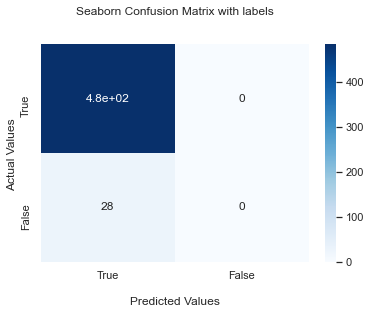

In [276]:
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [173]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511



In [174]:
log_loss(y_test,y_test_pred)

1.8925356928718187

# Dump the model for Deployment

In [171]:
import pickle

In [172]:
pickle.dump(rf_mod,open('Brainrf_mod.pkl','wb'))